## Challenge

Now that you have two new regression methods at your fingertips, it's time to give them a spin. In fact, for this challenge, let's put them together! Pick a dataset of your choice with a binary outcome and the potential for at least 15 features. If you're drawing a blank, the [crime rates in 2013](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table_8_offenses_known_to_law_enforcement_by_state_by_city_2013.xls/view) dataset has a lot of variables that could be made into a modelable binary outcome. 

Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

1. Vanilla logistic regression
2. Ridge logistic regression
3. Lasso logistic regression

If you're stuck on how to begin combining your two new modeling skills, here's a hint: the SKlearn LogisticRegression method has a "penalty" argument that takes either 'l1' or 'l2' as a value.https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

Record your work and reflections in a notebook to discuss with your mentor.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import metrics
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
import statsmodels.api as sm

In [13]:
ca = pd.read_csv("C:/Users/ushai/Dropbox/Data Science/Datasets/FBI/california_2017.csv")

In [14]:
ca.head(5)

,State,Population,Violent crime,Murder and nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adelanto,"33,693",238,2.0,28,48,160,578,190,290,98,13
1,Agoura Hills,"20,814",16,0.0,2,4,10,278,71,187,20,4
2,Alameda,"79,761",253,0.0,16,133,104,"2,347",219,"1,725",403,25
3,Albany,"19,880",36,0.0,1,28,7,523,77,383,63,3
4,Alhambra,"85,865",172,4.0,17,89,62,"1,877",363,"1,244",270,12


In [15]:
# examine dimensions
ca.ndim

2

In [16]:
# examine shape of data
ca.shape

(464, 12)

In [17]:
# Removing commas from population column
ca['Population'] = ca['Population'].str.replace(',', '')

In [18]:
# examine current columns
ca.columns

Index(['State', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape1', 'Robbery',
       'Aggravated\nassault', 'Property\ncrime', 'Burglary', 'Larceny-\ntheft',
       'Motor\nvehicle\ntheft', 'Arson'],
      dtype='object')

In [19]:
# Changing column names
ca.rename(columns = {'State':'City','Violent\ncrime': 'V_Crime', 'Murder and\nnonnegligent\nmanslaughter': 'Murder', 'Rape1':'Rape'\
                        ,'Property\ncrime':'Property_crime','Larceny-\ntheft':'Larceny_theft', 'Motor\nvehicle\ntheft':\
                       'Vehicle_theft', 'Aggravated\nassault':'Agg_Assault'}, inplace=True)

In [20]:
# verifying new column names
ca.columns

Index(['City', 'Population', 'V_Crime', 'Murder', 'Rape', 'Robbery',
       'Agg_Assault', 'Property_crime', 'Burglary', 'Larceny_theft',
       'Vehicle_theft', 'Arson'],
      dtype='object')

In [21]:
# examine data types
ca.dtypes

City               object
Population         object
V_Crime            object
Murder            float64
Rape               object
Robbery            object
Agg_Assault        object
Property_crime     object
Burglary           object
Larceny_theft      object
Vehicle_theft      object
Arson              object
dtype: object

In [22]:
# Changing Data types 
ca['Population'] = pd.to_numeric(ca['Population'], errors='coerce')
ca['V_Crime'] = pd.to_numeric(ca['V_Crime'], errors='coerce')
ca['Murder'] = pd.to_numeric(ca['Murder'], errors='coerce')
ca['Rape'] = pd.to_numeric(ca['Rape'], errors='coerce')
ca['Robbery'] = pd.to_numeric(ca['Robbery'], errors='coerce')
ca['Agg_Assault'] = pd.to_numeric(ca['Agg_Assault'], errors='coerce')
ca['Property_crime'] = pd.to_numeric(ca['Property_crime'], errors='coerce')
ca['Burglary'] = pd.to_numeric(ca['Burglary'], errors='coerce')
ca['Larceny_theft'] = pd.to_numeric(ca['Larceny_theft'], errors='coerce')
ca['Vehicle_theft'] = pd.to_numeric(ca['Vehicle_theft'], errors='coerce')
ca['Arson'] = pd.to_numeric(ca['Arson'], errors='coerce')

In [23]:
# Confirm Data types
ca.dtypes

City               object
Population        float64
V_Crime           float64
Murder            float64
Rape              float64
Robbery           float64
Agg_Assault       float64
Property_crime    float64
Burglary          float64
Larceny_theft     float64
Vehicle_theft     float64
Arson             float64
dtype: object

In [24]:
# Identify null values
ca.isnull().sum(axis=0)

City                0
Population          3
V_Crime            23
Murder              3
Rape                4
Robbery            11
Agg_Assault        14
Property_crime    194
Burglary           19
Larceny_theft     142
Vehicle_theft      23
Arson               4
dtype: int64

In [25]:
# Remove all null values
ca = ca.dropna()

In [26]:
# Verify null values
ca.isnull().sum(axis=0)

City              0
Population        0
V_Crime           0
Murder            0
Rape              0
Robbery           0
Agg_Assault       0
Property_crime    0
Burglary          0
Larceny_theft     0
Vehicle_theft     0
Arson             0
dtype: int64

In [27]:
# Verify shape of data after removing null values
ca.shape

(270, 12)

In [28]:
# Value counts for Murder (general exploration)
ca['Murder'].value_counts()

0.0    183
1.0     49
2.0     28
3.0      7
5.0      1
7.0      1
6.0      1
Name: Murder, dtype: int64

In [29]:
# Sorting column for Violent Crime (general exploration)
ca.sort_values('V_Crime', ascending=False).head()

,City,Population,V_Crime,Murder,Rape,Robbery,Agg_Assault,Property_crime,Burglary,Larceny_theft,Vehicle_theft,Arson
28,Barstow,24028.0,302.0,2.0,17.0,97.0,186.0,988.0,318.0,484.0,186.0,13.0
387,Selma,24817.0,292.0,3.0,12.0,17.0,260.0,873.0,300.0,411.0,162.0,7.0
108,Desert Hot Springs,28717.0,292.0,7.0,18.0,56.0,211.0,784.0,341.0,189.0,254.0,3.0
229,Lompoc,43948.0,243.0,2.0,34.0,37.0,170.0,974.0,225.0,598.0,151.0,8.0
0,Adelanto,33693.0,238.0,2.0,28.0,48.0,160.0,578.0,190.0,290.0,98.0,13.0


In [30]:
# Sorting column for Murder (general exploration)
ca.sort_values('Murder', ascending=False).head()

,City,Population,V_Crime,Murder,Rape,Robbery,Agg_Assault,Property_crime,Burglary,Larceny_theft,Vehicle_theft,Arson
108,Desert Hot Springs,28717.0,292.0,7.0,18.0,56.0,211.0,784.0,341.0,189.0,254.0,3.0
17,Arvin,21390.0,229.0,6.0,8.0,23.0,192.0,453.0,72.0,242.0,139.0,5.0
288,Orange Cove,9674.0,58.0,5.0,0.0,6.0,47.0,95.0,20.0,52.0,23.0,0.0
182,Huron,6973.0,66.0,3.0,6.0,6.0,51.0,54.0,16.0,24.0,14.0,29.0
197,King City,14037.0,57.0,3.0,9.0,2.0,43.0,196.0,71.0,72.0,53.0,2.0


In [31]:
# Add up values for all columns
ca['Aggregate'] = (ca.V_Crime + ca.Murder + ca.Rape + ca.Robbery + ca.Agg_Assault +ca.Property_crime + ca.Burglary+\
ca.Larceny_theft + ca.Vehicle_theft + ca.Arson)

In [32]:
# Data exploration on the Aggregate column
ca['Aggregate'].describe()

count     270.000000
mean      840.600000
std       634.964738
min         6.000000
25%       287.500000
50%       721.500000
75%      1235.500000
max      2593.000000
Name: Aggregate, dtype: float64

In [34]:
# classifying Aggregate mean score 840 or less as safe "1" and above not safe "0"
# 840 is the Aggregate mean
ca['Status'] = ca.Aggregate.apply(lambda x: 0 if x >= 414 else 1)

In [35]:
# Examine data
ca.head()

,City,Population,V_Crime,Murder,Rape,Robbery,Agg_Assault,Property_crime,Burglary,Larceny_theft,Vehicle_theft,Arson,Aggregate,Status
0,Adelanto,33693.0,238.0,2.0,28.0,48.0,160.0,578.0,190.0,290.0,98.0,13.0,1645.0,0
1,Agoura Hills,20814.0,16.0,0.0,2.0,4.0,10.0,278.0,71.0,187.0,20.0,4.0,592.0,0
3,Albany,19880.0,36.0,0.0,1.0,28.0,7.0,523.0,77.0,383.0,63.0,3.0,1121.0,0
5,Aliso Viejo,51984.0,44.0,0.0,4.0,8.0,32.0,394.0,62.0,299.0,33.0,3.0,879.0,0
6,Alturas,2491.0,39.0,2.0,2.0,3.0,32.0,129.0,31.0,88.0,10.0,2.0,338.0,1


Text(0.5,1,'CALIFORNIA CRIME')

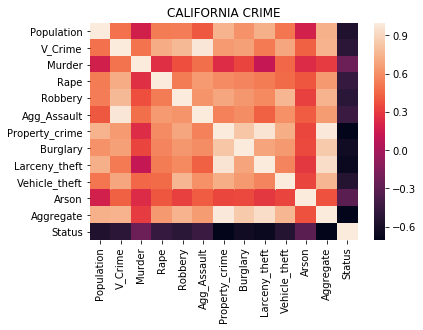

In [36]:
# Examine correlation using heat map.
sns.heatmap(ca.corr())
plt.title("CALIFORNIA CRIME")

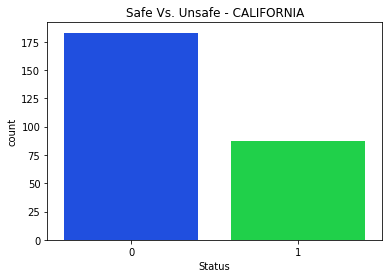

percentage of unsafe areas 67.78
percentage of safe areas 32.22


In [39]:
# Calculate percentage of safe vs. unsafe areas in CA
ca['Status'].value_counts()

plt.title("Safe Vs. Unsafe - CALIFORNIA")
sns.countplot(x='Status', data=ca, palette = 'bright')
plt.show()
plt.savefig('count')

count_unsafe = ca[ca['Status'] == 0].shape[0]
count_safe = len(ca[ca['Status'] ==1 ])
pct_unsafe = (count_unsafe/(count_unsafe + count_safe))*100
pct_safe = (count_safe/(count_unsafe + count_safe))*100
print("percentage of unsafe areas", np.round(pct_unsafe,2))
print("percentage of safe areas", np.round(pct_safe,2))

In [40]:
# Creating Features and Target variable
X = ca.loc[:, ~(ca.columns).isin(['City','Status','Aggregate'])]
y = ca['Status']

In [41]:
# running train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [42]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(202, 11)
(202,)
(68, 11)
(68,)


## Logistic Regression using "StatsModels"

In [43]:
# Declare predictors.
X_statsmod = X_train
y_statsmod = y_train

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_train['intercept'] = 1 

C:\Users\ushai\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [44]:
X_train.head(2)

,Population,V_Crime,Murder,Rape,Robbery,Agg_Assault,Property_crime,Burglary,Larceny_theft,Vehicle_theft,Arson,intercept
49,5139.0,6.0,0.0,0.0,2.0,4.0,76.0,14.0,55.0,7.0,0.0,1
404,6210.0,11.0,0.0,5.0,1.0,5.0,93.0,33.0,52.0,8.0,2.0,1


In [45]:
# Declare and fit the model.
logit = sm.Logit(y_statsmod, X_statsmod)

In [46]:
result = logit.fit()

         Current function value: 0.000001
         Iterations: 35


C:\Users\ushai\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\ushai\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [47]:
# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary2())

                                       Results: Logit
Model:                        Logit                    No. Iterations:           35.0000    
Dependent Variable:           Status                   Pseudo R-squared:         1.000      
Date:                         2018-12-15 12:40         AIC:                      20.0006    
No. Observations:             202                      BIC:                      53.0832    
Df Model:                     9                        Log-Likelihood:           -0.00027663
Df Residuals:                 192                      LL-Null:                  -126.14    
Converged:                    0.0000                   Scale:                    1.0000     
--------------------------------------------------------------------------------------------
                    Coef.         Std.Err.       z    P>|z|       [0.025          0.975]    
--------------------------------------------------------------------------------------------
Population      

C:\Users\ushai\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\ushai\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ushai\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ushai\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [51]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_y_statsmod = result.predict(X_statsmod)

C:\Users\ushai\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [52]:
# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

In [53]:
# Accuracy table.
table = pd.crosstab(y_statsmod, pred_y_statsmod)

In [1020]:
print('\n Accuracy by status')
print(table)


 Accuracy by status
col_0     0   1
Status         
0       138   0
1         0  64


In [54]:
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Percentage accuracy
1.0


## Logistic Regression using SK Learn

In [55]:
# Creating Features and Target variable
X = ca.loc[:, ~(ca.columns).isin(['City','Status','Aggregate'])]
y = ca['Status']

In [56]:
# running train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [57]:
# Choosing a model
# Parameter regularization coefficient"C" has been set to a very large number, which decreases the effectiveness 
# of the regularization so that parameter estimates will be similar to the ones from 'statsmodels' above.
logistic = LogisticRegression(C=1e9)

In [58]:
# Fitting the model
logistic.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [59]:
# R Square
R_Square = (logistic.score(X_train, y_train))
print ("R Square:{}".format(R_Square))

R Square:0.9900990099009901


In [60]:
# Regression Coefficents
print(logistic.coef_, logistic.intercept_)

[[ 5.04830311e-05 -1.83980645e-01 -5.09710159e-01  1.76629924e-01
  -2.39748141e-02  1.73074404e-01 -1.50365127e-02 -7.40840332e-03
  -7.98121466e-03  3.53105297e-04  5.75806366e-02]] [4.13185721]


In [61]:
# Make predictions on the testing set
y_pred = logistic.predict(X_test)

In [62]:
# Print Error's
print ("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 0.029411764705882353


In [64]:
coeff_logistic = pd.DataFrame(X_train.columns)
coeff_logistic['Coefficient Estimate'] = pd.Series(logistic.coef_[0])

In [65]:
coeff_logistic

,0,Coefficient Estimate
0,Population,0.000050
1,V_Crime,-0.183981
2,Murder,-0.509710
3,Rape,0.176630
4,Robbery,-0.023975
5,Agg_Assault,0.173074
6,Property_crime,-0.015037
7,Burglary,-0.007408
8,Larceny_theft,-0.007981
9,Vehicle_theft,0.000353


## Ridge Regression

In [66]:
# Creating Features and Target variable
X = ca.loc[:, ~(ca.columns).isin(['City','Status','Aggregate'])]
y = ca['Status']

In [67]:
# running train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [89]:
# Choosing a model
# As λ gets larger, the penalty for coefficient size also gets larger (Higher λ = lowered coefficent)
# and the solution that minimizes the cost function will by necessity have smaller coefficient estimates. 
# Regularization based on the sum of the squared weights is also called "L2 regularization".

ridge = linear_model.Ridge(alpha=1, fit_intercept=False) 

In [90]:
# Fitting the model
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [91]:
# R Square
R_Square = (ridge.score(X_train, y_train))
print ("R Square:{}".format(R_Square))

R Square:-0.39993813307985016


In [92]:
# Regression Coefficents
print(ridge.coef_, ridge.intercept_)

[ 5.67195770e-06  8.95423253e-04  8.49315544e-03  8.15603379e-04
 -8.16806932e-03 -2.45266251e-04  6.33901202e-05  2.68818271e-04
 -2.88756928e-04  8.33287774e-05  8.81828267e-03] 0.0


In [93]:
# Make predictions on the testing set
y_pred = ridge.predict(X_test)

In [94]:
# Print Error's
print ("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 0.4009127623405019


In [96]:
coeff_ridge = pd.DataFrame(X_train.columns)
coeff_ridge['Coefficient Estimate'] = pd.Series(ridge.coef_[0])

In [97]:
coeff_ridge

,0,Coefficient Estimate
0,Population,0.000006
1,V_Crime,NaN
2,Murder,NaN
3,Rape,NaN
4,Robbery,NaN
5,Agg_Assault,NaN
6,Property_crime,NaN
7,Burglary,NaN
8,Larceny_theft,NaN
9,Vehicle_theft,NaN


## Lasso Regression

In [98]:
# Choosing a model
lassoreg = linear_model.Lasso(alpha=5, normalize=False)

In [99]:
# Fitting the model
lassoreg.fit(X_train, y_train)

Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
# Logistic Regression R Square
R_Square = (lassoreg.score(X_train, y_train))
print ("R Square:{}".format(R_Square))

R Square:0.5003218047338218


In [101]:
# Regression Coefficents
print(lassoreg.coef_, lassoreg.intercept_)

[-4.29199790e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -9.43494441e-04 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00] 0.7491719344245686


In [102]:
# Make predictions on the testing set
y_pred = lassoreg.predict(X_test)

In [103]:
# Print Error's
print ("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 0.3166351235742147


In [106]:
coeff_lasso = pd.DataFrame(X_train.columns)
coeff_lasso['Coefficient Estimate'] = pd.Series(lassoreg.coef_[0])

In [107]:
coeff_lasso

,0,Coefficient Estimate
0,Population,-0.000004
1,V_Crime,NaN
2,Murder,NaN
3,Rape,NaN
4,Robbery,NaN
5,Agg_Assault,NaN
6,Property_crime,NaN
7,Burglary,NaN
8,Larceny_theft,NaN
9,Vehicle_theft,NaN
